I will be using MNIST data (labelled images of digits) to create vanilla dense Neural network model using **tensorflow** with the following characteristics:
- Input layer size of 784 (Since each image is 28 * 28)
- Three hidden layers of 300, 200 , 100
- Output layer of 10 (Since 0 - 9 digits)
- Use stochastic gradient descent

***I will be plotting my neural network graph (using tensorboard) and the plot of performance results (Training and Validation accuracies and loss) for every epoch***

Accessed MNIST data from **keras.datasets** [Link](https://keras.io/datasets/#mnist-database-of-handwritten-digits)

In [1]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import os
import pathlib
import tensorflow as tf
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import sklearn.metrics as sklm
from keras.models import Sequential
from keras.models import Model, load_model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense, Activation, Dropout
from keras.layers import Input, Flatten
from keras.utils.vis_utils import plot_model
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import losses
import sys
import cv2
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784). \
                    astype('float32') / 255

x_test = x_test.reshape(10000, 784) \
                    .astype('float32') / 255

In [22]:
t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "/tmp/{}/r{}/".format(log_dir, t)

# Then every time you have specified a graph run:
# file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

# Make directory if it doesn't exist

from pathlib import Path
home = str(Path.home())

logdir = os.path.join(os.sep,home,logd)

if not os.path.exists(logdir):
    os.makedirs(logdir)

In [25]:
# TensorBoard Graph visualizer in notebook
# Source: https://github.com/ikhlaqsidhu/data-x/blob/master/06b-tools-tensorflow/intro-to-tf_v2_afo.ipynb
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe)) 

In [30]:
graph2 = tf.Graph()

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 98us/step - loss: 0.0382 - acc: 0.9888 - val_loss: 0.0984 - val_acc: 0.9702
Epoch 2/5
48000/48000 [==============================] - 4s 93us/step - loss: 0.0295 - acc: 0.9907 - val_loss: 0.0860 - val_acc: 0.9752
Epoch 3/5
48000/48000 [==============================] - 4s 88us/step - loss: 0.0208 - acc: 0.9940 - val_loss: 0.0953 - val_acc: 0.9742
Epoch 4/5
48000/48000 [==============================] - 5s 106us/step - loss: 0.0169 - acc: 0.9951 - val_loss: 0.0888 - val_acc: 0.9759
Epoch 5/5
48000/48000 [==============================] - 5s 111us/step - loss: 0.0124 - acc: 0.9968 - val_loss: 0.0868 - val_acc: 0.9777


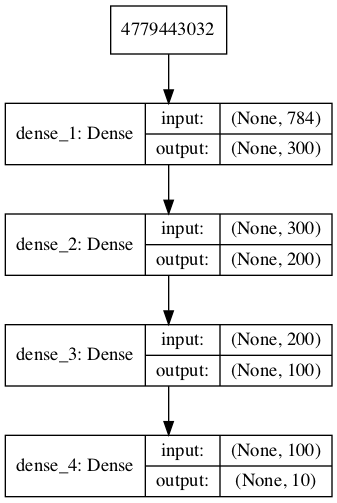

In [31]:
with graph2.as_default() as graph:
    model = Sequential()
    input_layer_size = 28*28 #784

# Hidden layer of 300
    model.add(Dense(300, activation = tf.nn.relu, \
                        input_shape = (input_layer_size,),))

    # Hidden layer of 200
    model.add(Dense(200, activation = tf.nn.relu))

    # Hidden layer of 100
    model.add(Dense(100, activation = tf.nn.relu))

    # Output layer of 10
    model.add(Dense(10, activation ='softmax'))
    # Define stochastic gradient descent optimizer
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Define sparse categorical crossentropy loss funtion
    scc = losses.sparse_categorical_crossentropy
# Compiling the model

    #model.compile(loss=scc, optimizer=sgd, metrics=['accuracy'])
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss=scc, optimizer=sgd, metrics=['accuracy'])
    NO_EPOCHS = 5
    history = model.fit(x_train, y_train,
                    batch_size=64,
                     epochs=NO_EPOCHS, 
                    validation_split=0.2)
    
plot_model(model, to_file = 'plzwork.png', show_shapes = True, show_layer_names = True) 
img = 'plzwork.png'
Image(filename = img)



In [32]:
show_graph(graph2)

In [27]:
history.history

{'val_loss': [0.16604638828337193,
  0.11370477696756522,
  0.10354240133985877,
  0.08854653939728936,
  0.09509952588984742],
 'val_acc': [0.9508333333333333,
  0.9671666666666666,
  0.9671666666666666,
  0.9738333333333333,
  0.97225],
 'loss': [0.3548200847804546,
  0.13247988372047742,
  0.08880276648327708,
  0.06487301035939405,
  0.04895169458755602],
 'acc': [0.8939583333333333,
  0.9600416666666667,
  0.9730208333333333,
  0.980625,
  0.9847291666666667]}

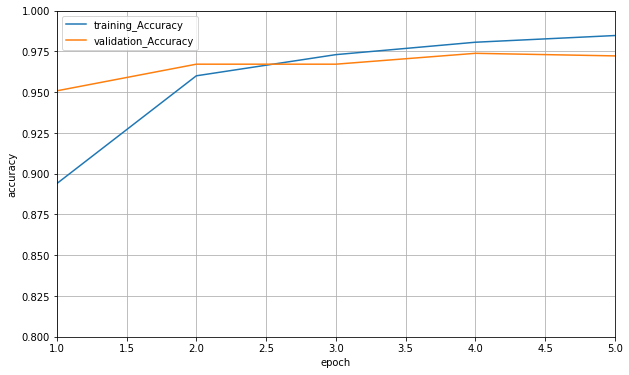

In [28]:
acc = pd.DataFrame({'epoch': range(1,NO_EPOCHS+1), 'training_Accuracy': history.history['acc'],'validation_Accuracy': history.history['val_acc']})
ax = acc.plot(x='epoch', figsize=(10,6), grid=True)
ax.set_ylabel("accuracy")
ax.set_ylim([0.8,1.0]);

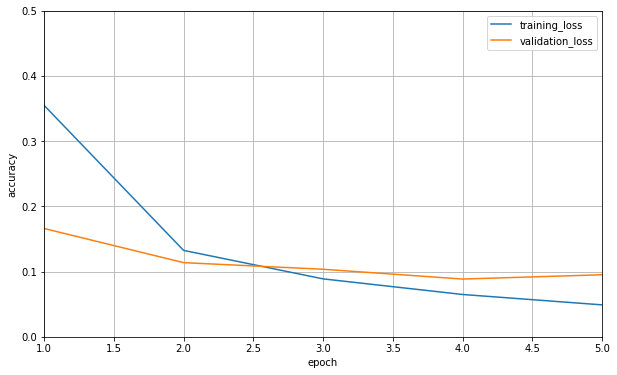

In [10]:
loss = pd.DataFrame({'epoch': range(1,NO_EPOCHS+1), 'training_loss': history.history['loss'],'validation_loss': history.history['val_loss']})
ax = loss.plot(x='epoch', figsize=(10,6), grid=True)
ax.set_ylabel("accuracy")
ax.set_ylim([0.0,0.5]);

In [ ]:
tf.reset_default_graph()

**Now I wil use transfer learning and use the Imagenet VGG16 model to train on MNIST data. Again I will be plotting the performance results (Training and Validation accuracies & loss) for every epoch**

In [2]:
# source: https://repl.it/@shravankumar/transferlearning-on-mnist-with-vgg16
img_dim_ordering = 'tf'
K.set_image_dim_ordering(img_dim_ordering)

# the model
def pretrained_model(img_shape, num_classes):
    model_vgg16_conv = VGG16(weights='imagenet', include_top = False)
    for layer in model_vgg16_conv.layers:
        layer.trainable = False

    keras_input = Input(shape = img_shape, name = 'image_input')
    output_vgg16_conv = model_vgg16_conv(keras_input)

    i = Flatten(name = 'flatten')(output_vgg16_conv)
    i = Dense(256, activation = 'relu', name = 'fc1')(i)
    i = Dense(64, activation = 'relu', name = 'fc2')(i)
    i = Dense(num_classes, activation='softmax', name='predictions')(i)
    
    model = Model(inputs = keras_input, outputs = i)
    model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model


In [3]:
# loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# converting it to RGB
x_train = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_train]
x_train = np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')

x_test = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_test]
x_test = np.concatenate([arr[np.newaxis] for arr in x_test]).astype('float32')


In [4]:
# training the model
model = pretrained_model(x_train.shape[1:], len(set(y_train)))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
history_2 = model.fit(x_train, y_train, epochs = 5, validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 735s 15ms/step - loss: 0.4000 - acc: 0.8871 - val_loss: 0.2455 - val_acc: 0.9216
Epoch 2/5
48000/48000 [==============================] - 758s 16ms/step - loss: 0.1941 - acc: 0.9377 - val_loss: 0.1841 - val_acc: 0.9408
Epoch 3/5
48000/48000 [==============================] - 785s 16ms/step - loss: 0.1633 - acc: 0.9459 - val_loss: 0.1756 - val_acc: 0.9460
Epoch 4/5
48000/48000 [==============================] - 766s 16ms/step - loss: 0.1458 - acc: 0.9520 - val_loss: 0.1689 - val_acc: 0.9472
Epoch 5/5
48000/48000 [==============================] - 758s 16ms/step - loss: 0.1260 - acc: 0.9579 - val_loss: 0.1503 - val_acc: 0.9517


In [7]:
NO_EPOCHS = 5

In [10]:
history_2.history

{'val_loss': [0.245475987482816,
  0.18407430649052064,
  0.17560310775289933,
  0.16888309672350685,
  0.15025254263418417],
 'val_acc': [0.9215833333333333,
  0.9408333333333333,
  0.946,
  0.9471666666666667,
  0.95175],
 'loss': [0.3999786295772841,
  0.19412270302139223,
  0.16328828335894893,
  0.14577386716334148,
  0.126035727940655],
 'acc': [0.8871041666666667,
  0.9377083333333334,
  0.9459166666666666,
  0.9519583333333334,
  0.9579375]}

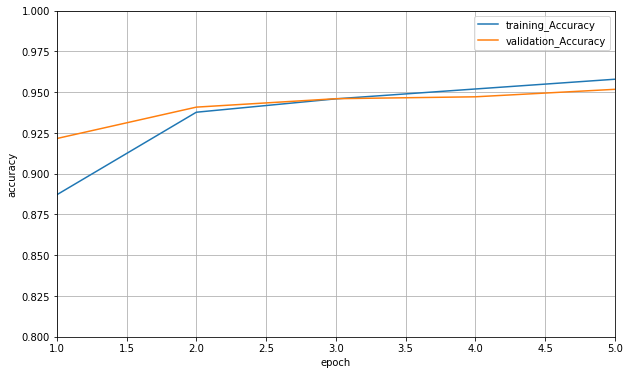

In [11]:
acc = pd.DataFrame({'epoch': range(1,NO_EPOCHS+1), 'training_Accuracy': history_2.history['acc'],'validation_Accuracy': history_2.history['val_acc']})
ax = acc.plot(x='epoch', figsize=(10,6), grid=True)
ax.set_ylabel("accuracy")
ax.set_ylim([0.8,1.0]);

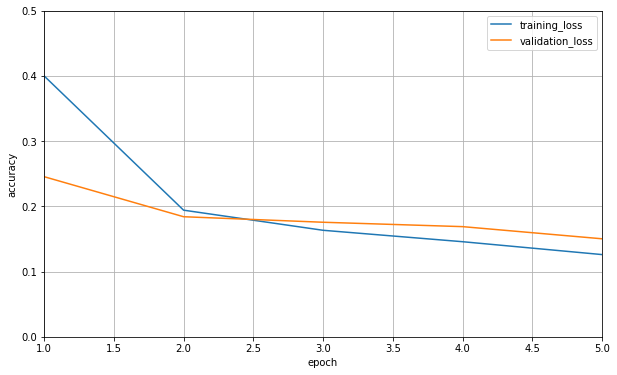

In [12]:
loss = pd.DataFrame({'epoch': range(1,NO_EPOCHS+1), 'training_loss': history_2.history['loss'],'validation_loss': history_2.history['val_loss']})
ax = loss.plot(x='epoch', figsize=(10,6), grid=True)
ax.set_ylabel("accuracy")
ax.set_ylim([0.0,0.5]);